In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
plt.style.use('ggplot')


## Import the Dataset `wine.csv`

In [29]:
wine=pd.read_csv("wine.csv")
wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [30]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [31]:
# not going to falloe EDA step here since it is already done in link1.(Above cell)
# as we know ID & award will not make much contribution during clutering. we will drop both columns.

wine1 =  wine.drop(['Type'], axis=1)
wine1.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

## Statistical Summary of the Dataset

In [32]:
wine.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

## Scale the Data - Standard Scaling

In [33]:
# scale the dataset with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine1)
wine_scaled = pd.DataFrame(wine_scaled, columns=wine1.columns)
wine_scaled.head()

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009  
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242  
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148  
3      -0.981875         1.032155  1.186068 -0.427544  1.184071  2.334574  
4       0.226796         0.401404 -0.319276  0.362177  0.449601 -0.037874

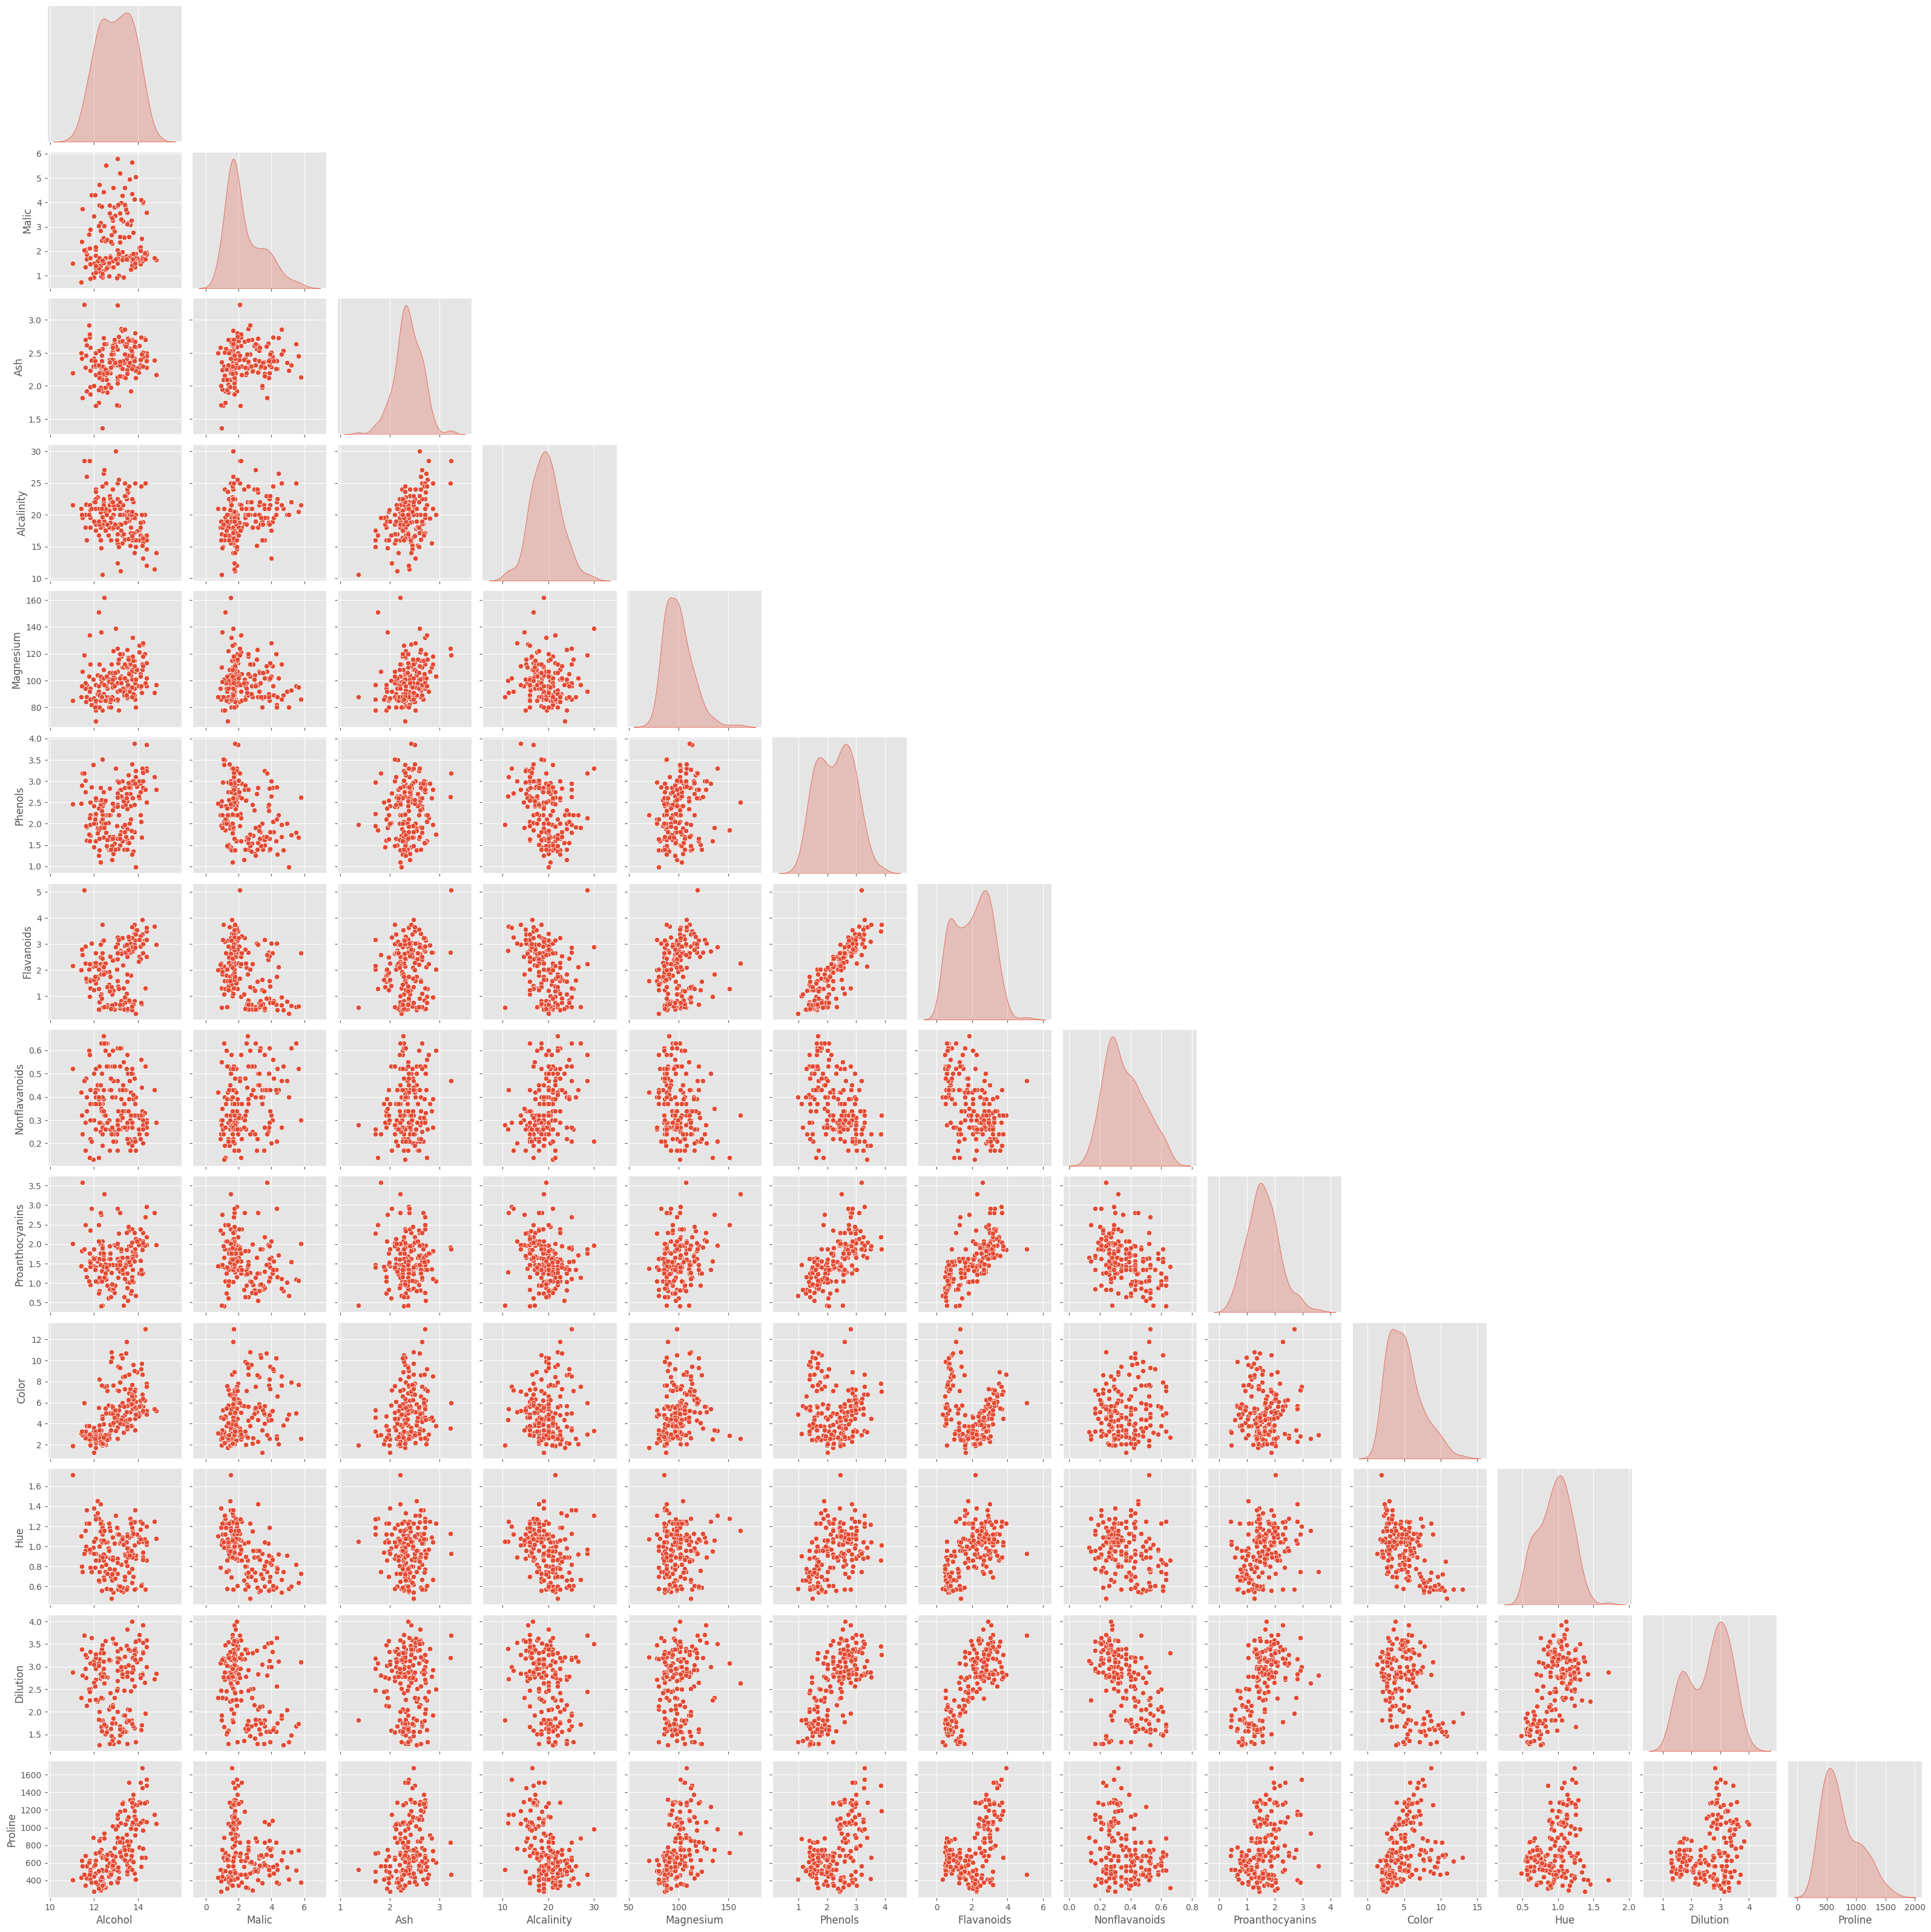

In [34]:
# pairplot
sns.pairplot(wine1,
            corner=True,
            diag_kind='kde');

## Implementing PCA

In [35]:
wine_scaled.shape

(178, 13)

In [36]:
# implement full PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=14, n_components=3)
wine_pca = pca.fit_transform(wine_scaled)

In [37]:
wine_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [38]:
# check the shape of the pca tranformed dataset - should be same as the scaled dataset
wine_pca.shape

(178, 3)

In [39]:
wine_pca2 = pd.DataFrame(wine_pca, columns=['PC1', 'PC2', 'PC3'])
wine_pca2.head()

PC1       PC2       PC3
0  3.316751 -1.443463 -0.165739
1  2.209465  0.333393 -2.026457
2  2.516740 -1.031151  0.982819
3  3.757066 -2.756372 -0.176192
4  1.008908 -0.869831  2.026688

In [40]:
# eigen values
evalues = pca.explained_variance_
evalues

array([4.73243698, 2.51108093, 1.45424187])

In [41]:
# eigen vectors
evectors = pca.components_
evectors


array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [42]:

print(pca.singular_values_)

[28.94203422 21.08225141 16.04371561]


In [43]:
# variance containing in each formed PCA

print(pca.explained_variance_ratio_*100)

[36.1988481  19.20749026 11.12363054]


In [44]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca.explained_variance_ratio_*100)
cum_variance

array([36.1988481 , 55.40633836, 66.52996889])

In [45]:
# finding optimum number of clusters using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(wine_scaled)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works

Text(0, 0.5, 'WSS')

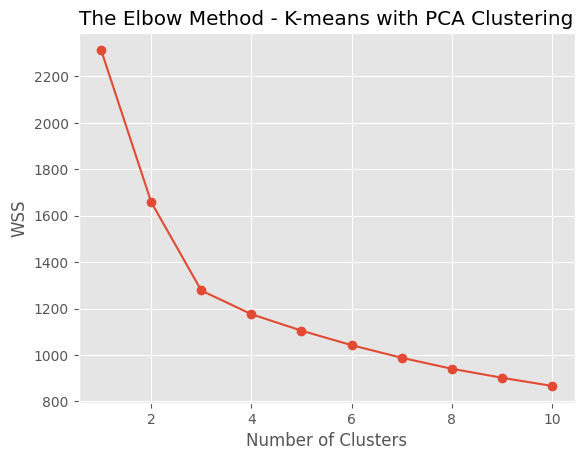

In [46]:
# plot the crime
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method - K-means with PCA Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

In [47]:
# optimum number of cluster is 4. implement a kmeans clustering modek with k =4 and get the labels
km2 = KMeans(n_clusters=3,  init = 'k-means++',random_state=42)
km2.fit(wine_scaled)

KMeans(n_clusters=3, random_state=42)

In [48]:
km2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [49]:
# Assign clusters to the data set
wine1=wine1.copy()
wine1['clustersid']=km2.labels_
wine1

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     clustersid  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
173           0  
174           0  
175           0  
176           0  
177           0  

[178 rows x 14 columns]

C:\Users\astik\AppData\Local\Temp\ipykernel_13000\55418654.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(wine_pca[:,0], wine_pca[:,1], cmap='tab10')


Text(0, 0.5, 'Second Principal Component')

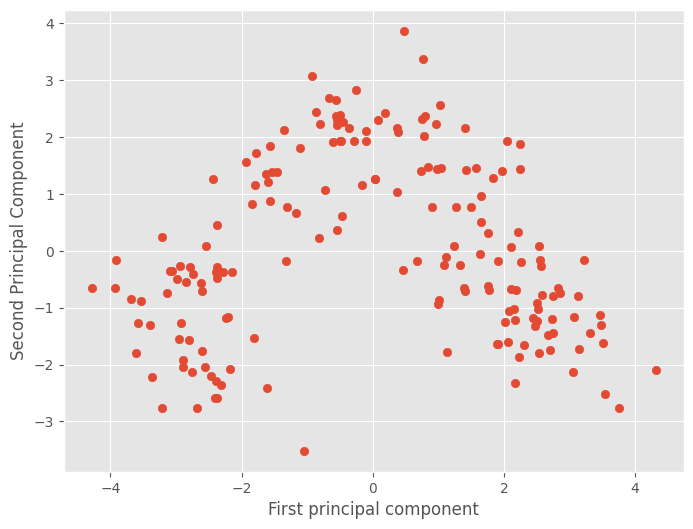

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(wine_pca[:,0], wine_pca[:,1], cmap='tab10')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [51]:
# add labels to the original dataset as a new column
labels = km2.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [52]:
wine1['cluster_labels'] = labels
wine1.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  clustersid  \
0           0.28             2.29   5.64  1.04      3.92     1065           1   
1           0.26             1.28   4.38  1.05      3.40     1050           1   
2           0.30             2.81   5.68  1.03      3.17     1185           1   
3           0.24             2.18   7.80  0.86      3.45     1480           1   
4           0.39             1.82   4.32  1.04      2.93      735           1   

   cluster_labels  
0               1  
1               1  
2               1  
3               1  
4               1

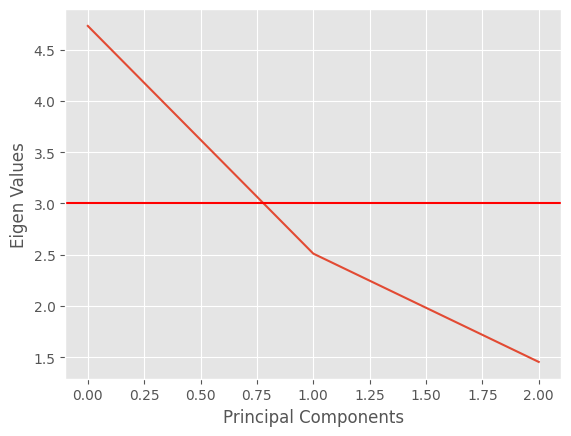

In [63]:
# deciding the optimal number of components - scree plot of eigen values with cut off at 1
plt.plot(range(0,3),evalues)
plt.axhline(y=3, color='r', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values');

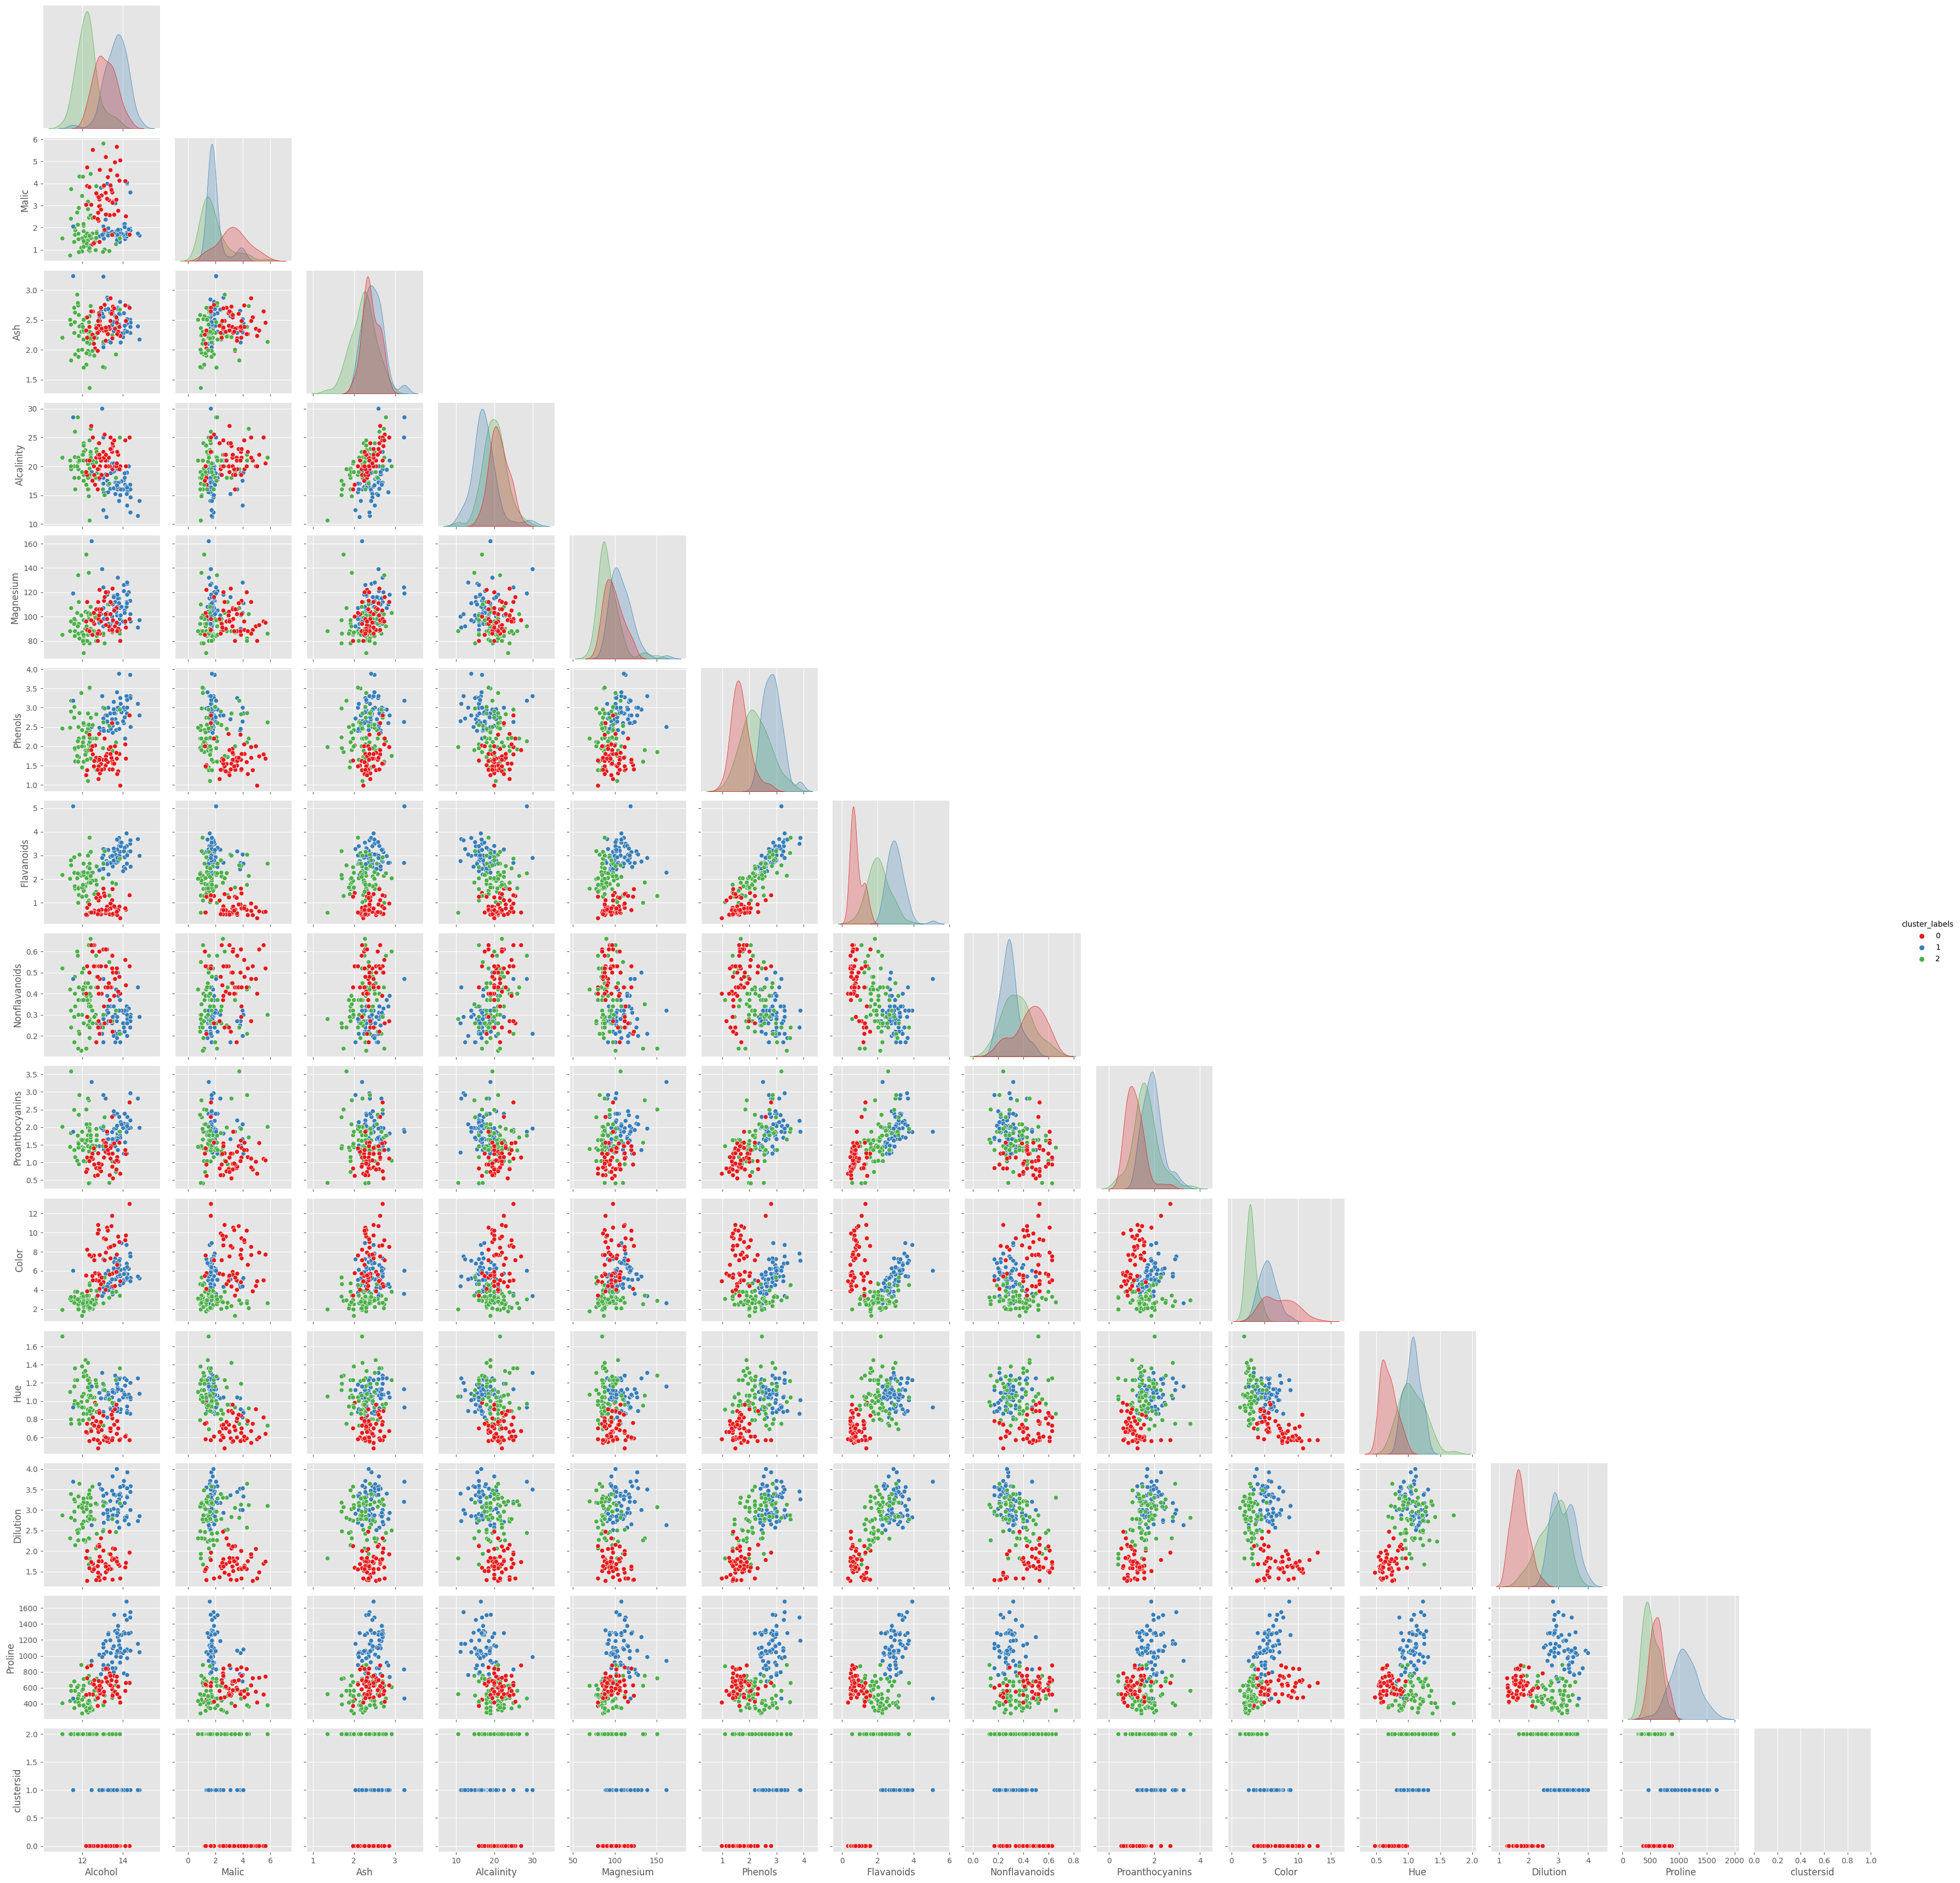

In [54]:
# plot a pairplot with cluster label as hue
sns.pairplot(wine1, hue='cluster_labels', palette='Set1',corner=True);

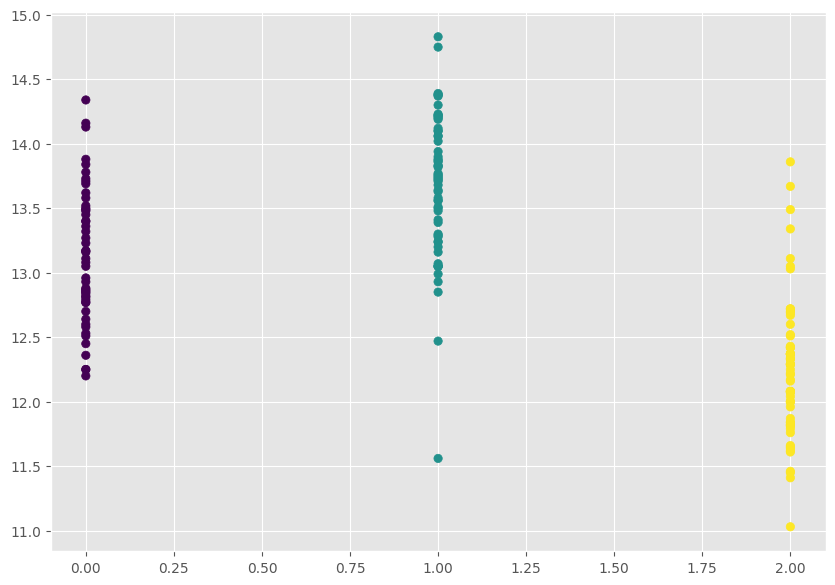

In [66]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(wine1['cluster_labels'],wine1['Alcohol'], c=km2.labels_) 

#Heirarchial Clustering

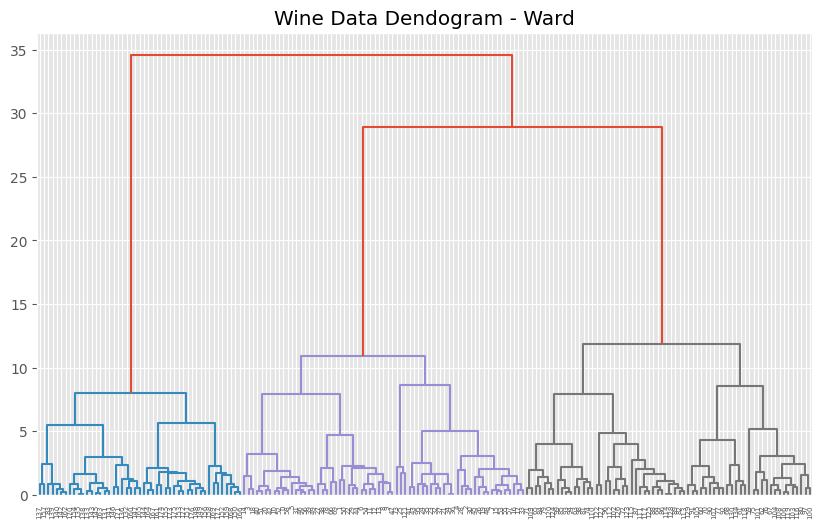

In [55]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 6))
plt.title("Wine Data Dendogram - Ward")
dend = shc.dendrogram(shc.linkage(wine_pca2, method='ward'))